<a href="https://colab.research.google.com/github/Shashank123-hub/MachineLearning/blob/master/Cats_and_dogs_image_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model number 2 :**

Here, we will make a convolutional neural network to identify and classify image of cats and dogs. For this, we will use the training set from the google ***Kaggle*** trainng set wich almost consists of around 6 million images of dogs and cats of which 25,000 are available.

Also, we will use image augmentation to resolve the  issue of ***overfitting*** by issuing a ***validation set*** along with the training set which will simultaneously check for the accuracy of the neural network in recogonizing the images furthur reducing the phenomena of overfitting.

# **Title : Cats & Dogs image classification with image augmentation**

# **Step 1 : Importing all dependancies**


In [0]:
import tensorflow as tf  #Importing tensorflow

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Importing the Imagedatagenerator class

In [0]:
import os          #Importing other dependancies like numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

#**Step 2 : Loading the data**

Here, we are simply downloading the dataset to train our model.
Our dataset here will be downloaded from Kaggle which is provided by Microsoft research.

The *ImageDataGenerator* simply reads the data from the disk. So, we simply need to download the dataset from the URL and unzip in the colab filesystem.

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL , extract=True)

# **Step 3 : Defining the data**

Here, we assign variables to our dataset and define the training and validation dataset

In [0]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [48]:
print('Total training cat images:', num_cats_tr)
print('Total training dog images:', num_dogs_tr)
print("Total training images:", total_train)
print("--")
print('Total validation cat images:', num_cats_val)
print('Total validation dog images:', num_dogs_val)
print("Total validation images:", total_val)
print("--")



Total training cat images: 1000
Total training dog images: 1000
Total training images: 2000
--
Total validation cat images: 500
Total validation dog images: 500
Total validation images: 1000
--


# **Step 4 : Setting model parameters**

Here, we are simply defining the shape of our images and the batch size for our dataset.
 
After defining this, the ***flow_from_directory*** method will load images in the disk and will apply rescaling and resizing into required dimensions.

In [0]:
BATCH_SIZE = 100
IMG_SHAPE = 150 # Our training data consists od images with width of 150 pixels and the height of 150 pixels.

# **Step 4 : Data Augmentation**

This is the necessary step to avoid the problem of *overfitting* in the given neural network model. Overfitting refers to the problem where our model begins to learn the given training data after and training and performs poorly in the test dataset.

The goal is at the training time, your model will never see the exact picture twice. This exposes the model to more aspects od the data, allowing it to generalize better among the different dataset. 

What Image Augmentation basically does is that is takes the pcitures and apllying different transformations to it several times so that our modes is exposed to different dataset.

In [0]:
# The below function will plot the images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
      ax.imshow(img)
  plt.tight_layout()
  plt.show()

In [59]:
image_gen_train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,          #applying all the transformations to the training dataset
    width_shift_range = 0.2,      #Rotation,zooming,flipping,scaling etc.
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_data_gen = image_gen_train.flow_from_directory(batch_size = BATCH_SIZE,
                                                     directory = train_dir,
                                                     shuffle= True,
                                                     target_size = (IMG_SHAPE,IMG_SHAPE),
                                                     class_mode = 'binary')


Found 2000 images belonging to 2 classes.


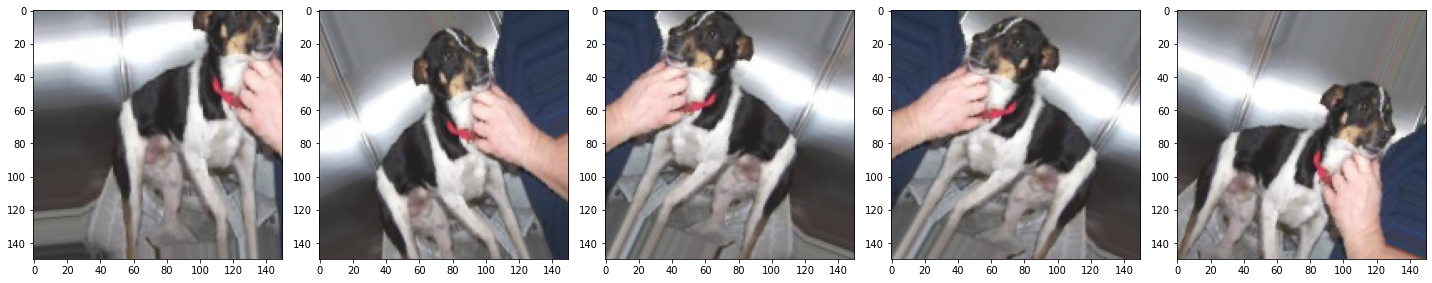

In [60]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

# **Step 4(a) : Creating validation data generator**

Generally, we only apply data augmentation to our training examples. In this case, we are only rescaling or validation images and cnverting them into batches into ImageDataGenerator


In [61]:
image_gen_val = ImageDataGenerator(rescale = 1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size = BATCH_SIZE,
                                                 directory = validation_dir,
                                                 target_size = (IMG_SHAPE,IMG_SHAPE),
                                                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


# **Step 5 : Define the model**

This model consists of for convolutional blocks with a maxpool layer in each of them.

Before the final dense layers, we are also applying a Droupout Probablity of 0.5. That means that 50% of the values in the dropout layer will be ste to zero which will enable to reduce overfitting.

Then we will have a fully connected layer with 512 units with a ***relu*** activation function. Also, the model will output class probablities for two classes - dogs and cats - using ***softmax*** 


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)), #indicating the image of 150 pixels each in height and width with 3 denoting the specific RGB layers.
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), #one of the four convolution block with max pool layer
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5), #dropout fucntion for each layer with 0.5 probability
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), #fully connected layer with 512 units
    tf.keras.layers.Dense(2)
])

# **Step 6 : Compiling the model**

We will use adam optimizer just like the previous neural network models.

Since, we output a sofmax categorization, we'll use sparse_categorical_crossentropy as the loss function.And will also aplly the traing and validation accuracy on each epoch. 


In [0]:
model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# **Summarizing the model**

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

# **Step 7 : Traing the model**

Since , our batches are coming from a generator , we'll use ***fit_generator*** instead of ***fit***

In [0]:
epochs=100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs = epochs,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/100
20/20 [==============================] - 103s 5s/step - loss: 0.7100 - accuracy: 0.5010 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 103s 5s/step - loss: 0.6941 - accuracy: 0.4890 - val_loss: 0.6927 - val_accuracy: 0.6070
Epoch 3/100
20/20 [==============================] - 103s 5s/step - loss: 0.6925 - accuracy: 0.5200 - val_loss: 0.6849 - val_accuracy: 0.5670
Epoch 4/100
20/20 [==============================] - 103s 5s/step - loss: 0.6862 - accuracy: 0.5345 - val_loss: 0.6895 - val_accuracy: 0.5140
Epoch 5/100
20/20 [==============================] - 102s 5s/step - loss: 0.6795 - accuracy: 0.5625 - val_loss: 0.7248 - val_accuracy: 0.5370
Epoch 6/100
20/20 [==============================] - 106s 5s/step - loss: 0.6691 - accuracy: 0.5950 - val_loss: 0.6463 - val_accuracy: 0.6130
Epoch 7/100
20/20 [==============================] - 103s 5s/step - loss: 0.6532 - accuracy: 0.6115 - val_loss: 0.7167 - val_accuracy: 0.5540
Epoch 

# **Final Step : Visualizing the results of our training**

In [0]:
print('The accracy and loss plots of respective training and validation sets are given below.')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()